##### 讀取並播放影片
這篇教學會介紹 OpenCV 裡的 VideoCapture() 方法，透過這個方法，讀取電腦中的影片，或開啟電腦的攝影鏡頭讀取影像畫面。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### VideoCapture() 開啟影片 
使用 VideoCapture() 方法時，如果參數指定「影片路徑」，可以開啟電腦中的影片，如果參數指定「0、1、2...」數字，\
則會開啟電腦的攝影鏡頭讀取影像畫面，數字代表鏡頭的編號，通常都從 0 開始，如果有外接鏡頭可能會是 1、2 之類的編號。

In [ ]:
cap = cv2.VideoCapture(0)         # 讀取攝影鏡頭
cap = cv2.VideoCapture('1080_1920_30fps.mp4') # 讀取電腦中的影片

如果有遇到錯誤訊息 ( 特別是 Windows )，可以嘗試加入第二個 cv2.CAP_DSHOW 參數 ( 表示 DirectShow，也就是目前系統 )。

* cv2.CAP_DSHOW 是 DirectShow，內容是一個「數值」，使用後等同輸入 700，第二個參數詳細可以參考：[Flags for video I/O](https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html)

In [ ]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

使用 VideoCapture() 之後，通常會再透過 cap.isOpened() 來判斷影片是否正常開啟，如果正常開啟會回傳 True，\
否則是 False，下方的程式碼執行後，會讀取電腦攝影鏡頭，如果沒有讀取到鏡頭資訊，就會印出 Cannot open camera 的文字。

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

順利開起影片後，就能使用 cap.read() 的方法，讀取影片的每一幀 ( 例如 60fps 表示一秒鐘有六十幀 )，\
讀取後會回傳兩個值，第一個值 ret 為 True 或 False，表示順利讀取或讀取錯誤，第二個值表示讀取到影片某一幀的畫面，\
如果讀取成功，就能透過 imshow() 的方法，將該幀的畫面顯示出來，下方的程式碼除了顯示圖片，更搭配 waitKey(1) 方法，\
就能不斷更新顯示的圖片，看起來就像播放影片一般。

* 使用 waitKey(1) 表示每一毫秒更新一次畫面，參數數值設定越大，圖片更新時間就會越長，影片看起來就會出現延遲的狀況。

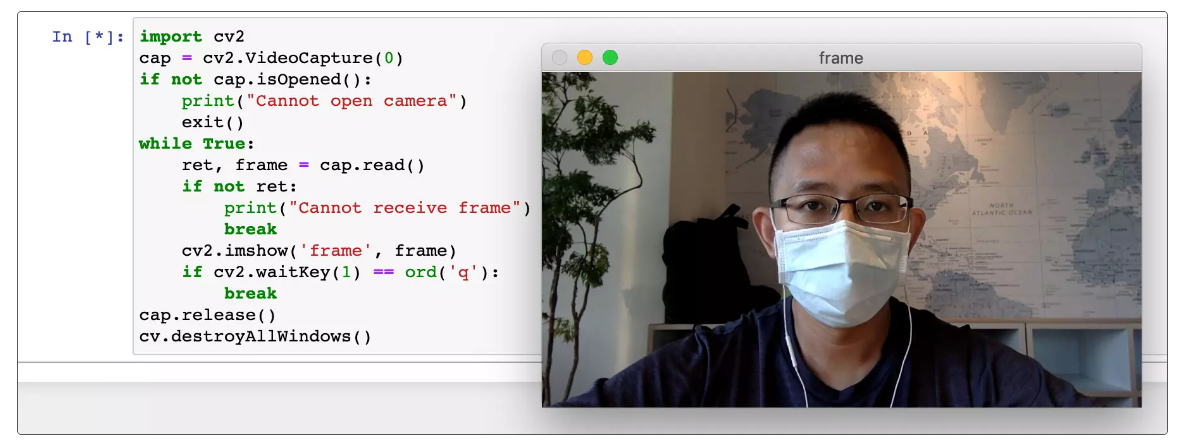

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()             # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    cv2.imshow('oxxostudio', frame)     # 如果讀取成功，顯示該幀的畫面
    if cv2.waitKey(1) == ord('q'):      # 每一毫秒更新一次，直到按下 q 結束
        break
cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

##### 搭配 cvtColor() 改變影片色彩 
cvtColor() 方法可以改變圖片的色彩，如果將影片每一幀的圖片套用 cvtColor()，最後就會呈現的改變顏色的影片，\
下面的程式碼執行後，就會讀取電腦攝影機，並將彩色影片轉換成黑白色彩的影片。

色彩模式參考：[cvtColor() 顏色轉換名稱與數字對照](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

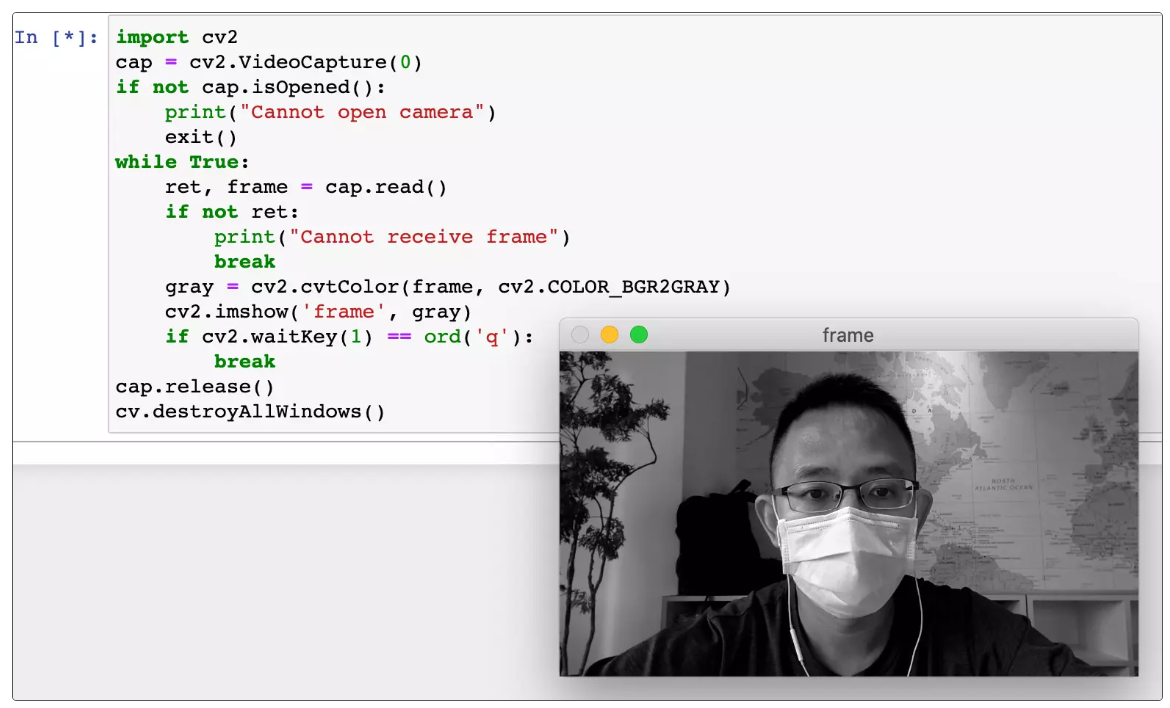

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 轉換成灰階
    # gray = cv2.cvtColor(frame, 6)  # 也可以用數字對照 6 表示轉換成灰階
    cv2.imshow('oxxostudio', gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

##### 讀取串流圖片 MJPEG ( Motion JPEG ) 
使用 cap.read() 不僅能讀取電腦攝影機畫面，也可以讀取 MJPEG ( Motion JPEG ) 的圖片串流格式，\
Motion JPEG ( Motion Joint Photographic Experts Group、M-JPEG ) 是一種影像壓縮格式，\
每一個視訊框圖像分別使用 JPEG 編碼，常用在網路攝影機、物聯網攝影機之類的裝置。

下方的範例讀取交通部的「[CCTV 開放資料集](https://www.motc.gov.tw/201506260001/app/govdata_list/view?module=&id=1615&uid=201705111088)」所提供的「[國道監視器影像](https://tisvcloud.freeway.gov.tw/history/motc20/CCTV.xml)」，讀取後就能開啟 OpenCV 視窗並即時監看特定影像。

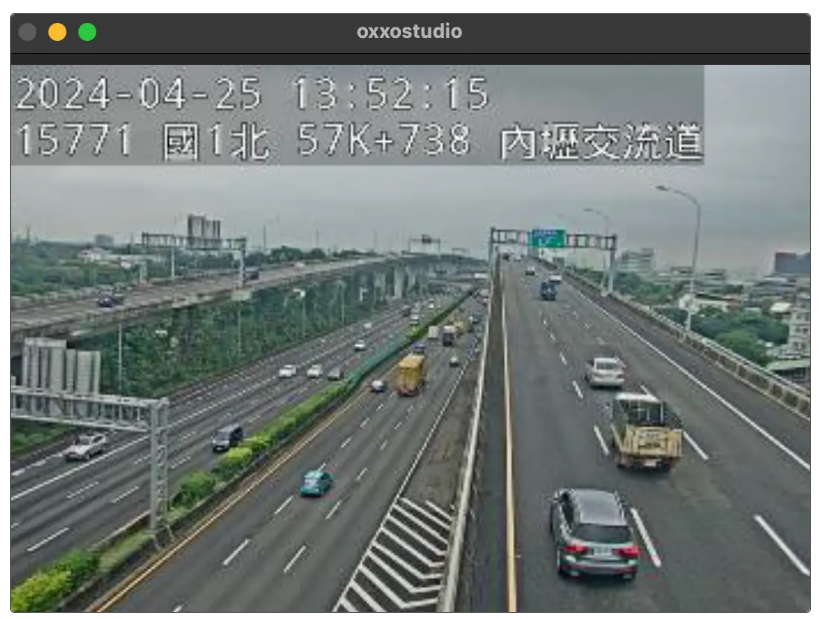

In [ ]:
import cv2
cap = cv2.VideoCapture('https://cctvn.freeway.gov.tw/abs2mjpg/bmjpg?camera=15771')

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()             # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        # 出現錯誤就再讀取一次，避免程式到此處就停止
        cap = cv2.VideoCapture('https://cctvn.freeway.gov.tw/abs2mjpg/bmjpg?camera=15771')
        continue
    cv2.imshow('oxxostudio', frame)     # 如果讀取成功，顯示該幀的畫面
    if cv2.waitKey(1) == ord('q'):      # 每一毫秒更新一次，直到按下 q 結束
        break
cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗